# Stock Data Analysis Notebook

## Introduction
Briefly describe the goal of your analysis.

## Setup
Import necessary libraries and load environment variables.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("API_KEY")

## Data Collection
Fetch stock data using the `alpha_vantage` API for the stocks of interest.
APPL, GOOGL, MSFT is what I was thinking for now

In [4]:
ts = TimeSeries(key=api_key, output_format='pandas')

def fetch_stock_data(symbol):
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='compact')
    return data

aapl_data = fetch_stock_data('AAPL')

## Data Exploration and Cleaning
Explore the data to identify any inconsistencies or missing data. Clean or preprocess as necessary.


In [5]:
# Example: Checking for missing values
print(aapl_data.isnull().sum())


1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64


## Descriptive Statistics
Calculate and interpret descriptive statistics for the stocks.


In [6]:
print(aapl_data.describe())


          1. open     2. high     3. low    4. close     5. volume
count  100.000000  100.000000  100.00000  100.000000  1.000000e+02
mean   184.075500  185.621561  182.81304  184.436000  5.480296e+07
std      8.629023    8.243947    8.57931    8.365795  1.412066e+07
min    166.910000  168.960000  165.67000  166.890000  2.404834e+07
25%    176.295000  178.312500  175.34750  177.405000  4.605576e+07
50%    185.085000  186.845000  183.85250  185.745000  5.342266e+07
75%    191.057500  192.117500  189.77500  191.477500  6.033631e+07
max    198.020000  199.620000  197.00000  198.110000  1.285384e+08


In [7]:
# Calculate 20-day moving average
aapl_data['20-day SMA'] = aapl_data['4. close'].rolling(window=20).mean()


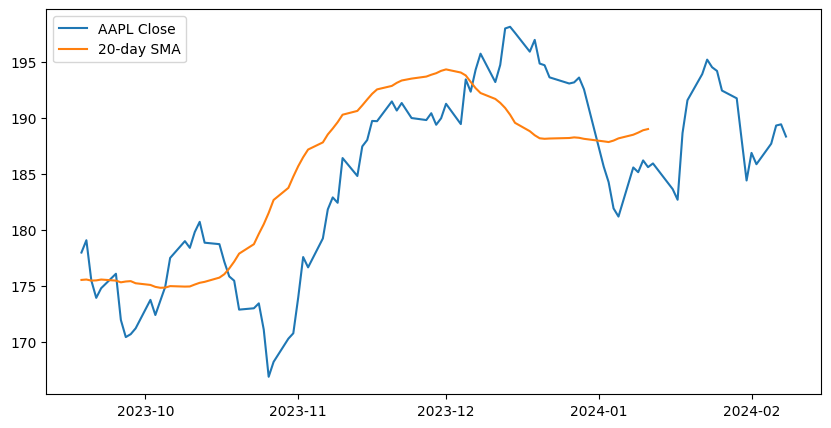

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(aapl_data['4. close'], label='AAPL Close')
plt.plot(aapl_data['20-day SMA'], label='20-day SMA')
plt.legend()
plt.show()
